In [1]:
import pandas as pd
orig_df = pd.read_csv('https://github.com/gopalkoduri/flisound/blob/master/data/Ratings_Warriner_et_al.csv?raw=true', index_col=0)
orig_df.to_csv('Ratings_Warriner_et_al.csv', index=False)

df = pd.read_csv('Ratings_Warriner_et_al.csv')
df

Word  V.Mean.Sum  V.SD.Sum  V.Rat.Sum  A.Mean.Sum  A.SD.Sum  \
0         aardvark        6.26      2.21         19        2.41      1.40   
1          abalone        5.30      1.59         20        2.65      1.90   
2          abandon        2.84      1.54         19        3.73      2.43   
3      abandonment        2.63      1.74         19        4.95      2.64   
4            abbey        5.85      1.69         20        2.20      1.70   
5          abdomen        5.43      1.75         21        3.68      2.23   
6        abdominal        4.48      1.59         23        3.50      1.82   
7           abduct        2.42      1.61         19        5.90      2.57   
8        abduction        2.05      1.31         19        5.33      2.20   
9            abide        5.52      1.75         21        3.26      2.22   
10         abiding        5.57      1.75         23        3.59      2.26   
11         ability        7.00      1.59         20        4.85      2.74   
12          abject        4.00      1.29         19        3.94      2.41   
13          ablaze        5.15      1.79         20        6.75      2.12   
14            able        6.64      1.79         22        3.38      2.25   
15        abnormal        3.53      1.22         19        4.48      2.29   
16     abnormality        3.05      1.81         19        5.00      2.62   
17           abode        5.28      1.27         18        2.90      1.89   
18         abolish        3.84      1.54         19        4.18      2.07   
19      abominable        4.05      1.23         20        5.45      2.44   
20     abomination        2.50      1.65         18        5.90      2.59   
21           abort        3.10      1.37         20        5.80      2.44   
22        abortion        2.58      1.84         19        5.43      2.38   
23     abracadabra        5.11      2.52         18        5.27      2.64   
24        abrasive        4.26      1.69         19        6.10      1.89   
25         abreast        4.62      1.94         21        4.61      2.33   
26          abrupt        3.28      1.64         18        5.23      2.00   
27         abscess        2.79      1.58         19        4.00      2.38   
28         absence        3.86      2.08         21        4.30      2.13   
29          absent        4.10      1.55         21        3.72      2.48   
...            ...         ...       ...        ...         ...       ...   
13885        young        6.31      1.59         39        4.09      2.22   
13886    youngster        6.05      1.72         21        4.55      2.19   
13887        youth        6.53      1.58         19        4.14      2.58   
13888     youthful        6.89      1.97         19        5.68      2.50   
13889        yucky        3.36      2.01         22        4.35      2.58   
13890     yuletide        6.19      1.99         21        4.00      2.24   
13891        yummy        7.52      1.94         21        4.48      2.50   
13892       yuppie        4.64      2.48         22        4.65      2.37   
13893          zap        5.39      2.52         18        4.41      2.44   
13894         zeal        6.15      2.08         20        5.33      2.71   
13895        zebra        6.47      2.34         19        3.90      2.75   
13896       zenith        5.20      1.79         20        3.71      2.12   
13897       zephyr        5.50      1.50         20        3.41      2.20   
13898         zest        6.76      1.53         41        5.41      2.44   
13899         zeta        5.55      0.94         20        3.75      2.20   
13900       zigzag        5.18      1.30         22        5.42      2.34   
13901        zilch        3.89      1.78         18        4.05      2.21   
13902      zillion        5.81      2.23         21        4.26      2.83   
13903         zinc        4.79      1.65         19        3.17      2.04   
13904         zing        6.95      1.90         19        4.81      2.69   
13905     

In [2]:
# WTF do the keys mean?
from collections import defaultdict

k_d = defaultdict(set)

for striped in [k.split('.') for k in df.keys()]:
    if len(striped) > 1:
        dim, measure, sub = striped
        k_d[measure].update(sub)
k_d

defaultdict(set,
            {'Mean': {'F', 'H', 'L', 'M', 'O', 'S', 'Y', 'm', 'u'},
             'SD': {'F', 'H', 'L', 'M', 'O', 'S', 'Y', 'm', 'u'},
             'Rat': {'F', 'H', 'L', 'M', 'O', 'S', 'Y', 'm', 'u'}})

In [3]:
# From http://crr.ugent.be/papers/Warriner_et_al_affective_ratings.pdf
key_map = {
    'M':'Male',
    'F':'Female',
    'H': 'High Education (Degree or higher)',
    'L': 'Low Education (Partial degree or lower)',
    'Y': 'Younger',
    'O': 'Older',
    'm': 'm',
    'u': 'u'
}

<IPython.core.display.Javascript object>


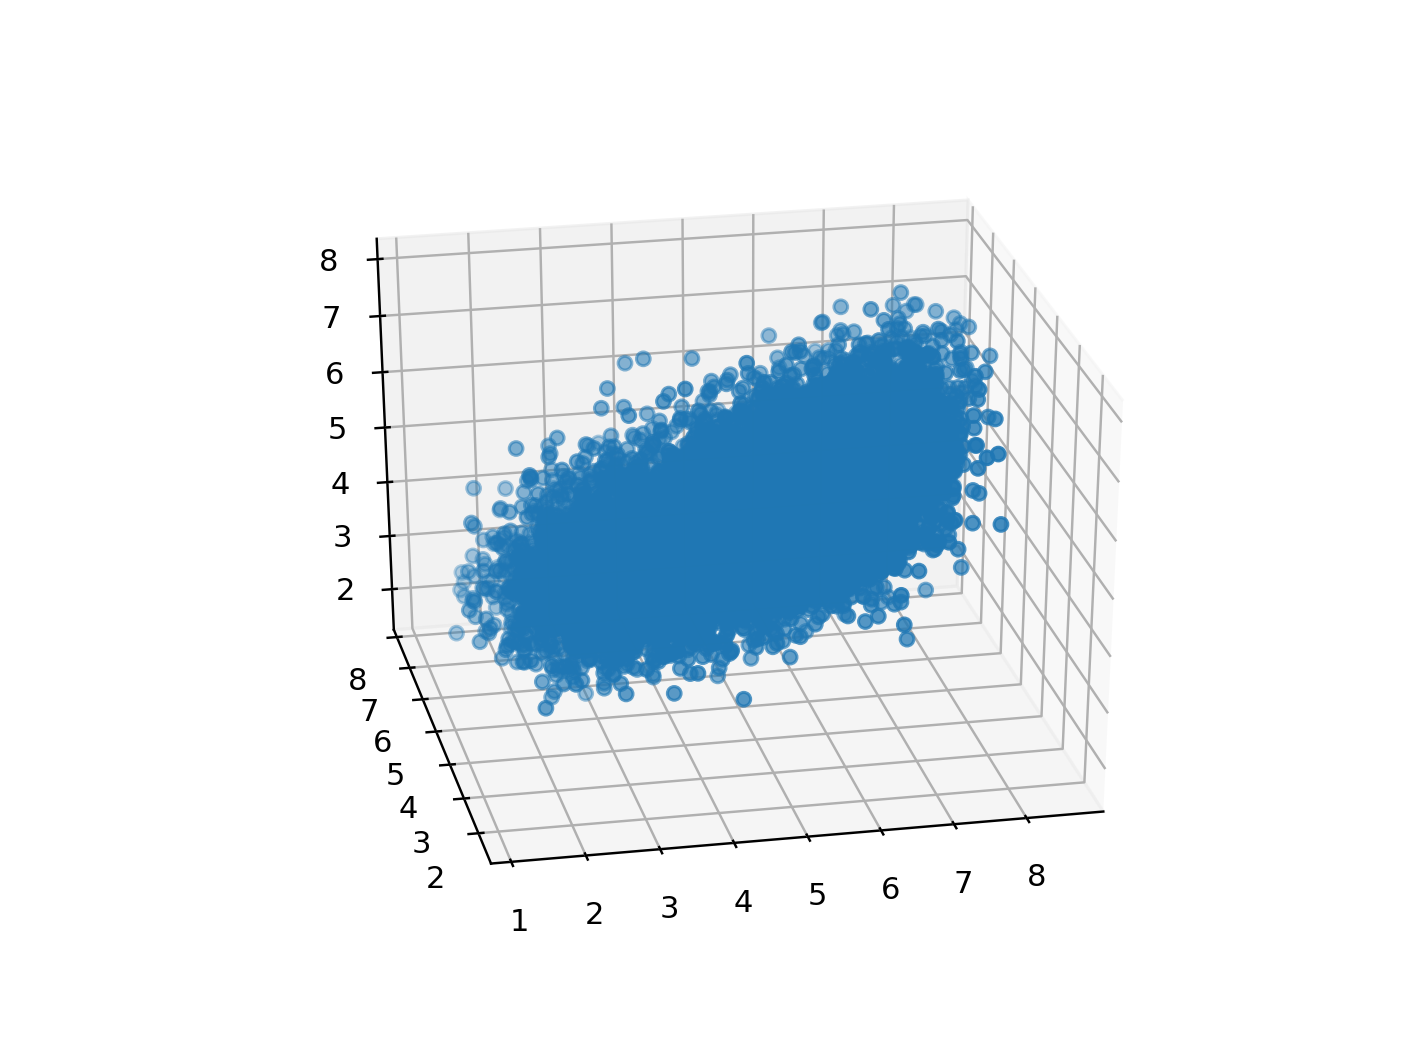

In [13]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
targets=['V.Mean.Sum','A.Mean.Sum','D.Mean.Sum']
v,a,d = df[targets].values.T
ax.scatter(v,a,d)

<IPython.core.display.Javascript object>


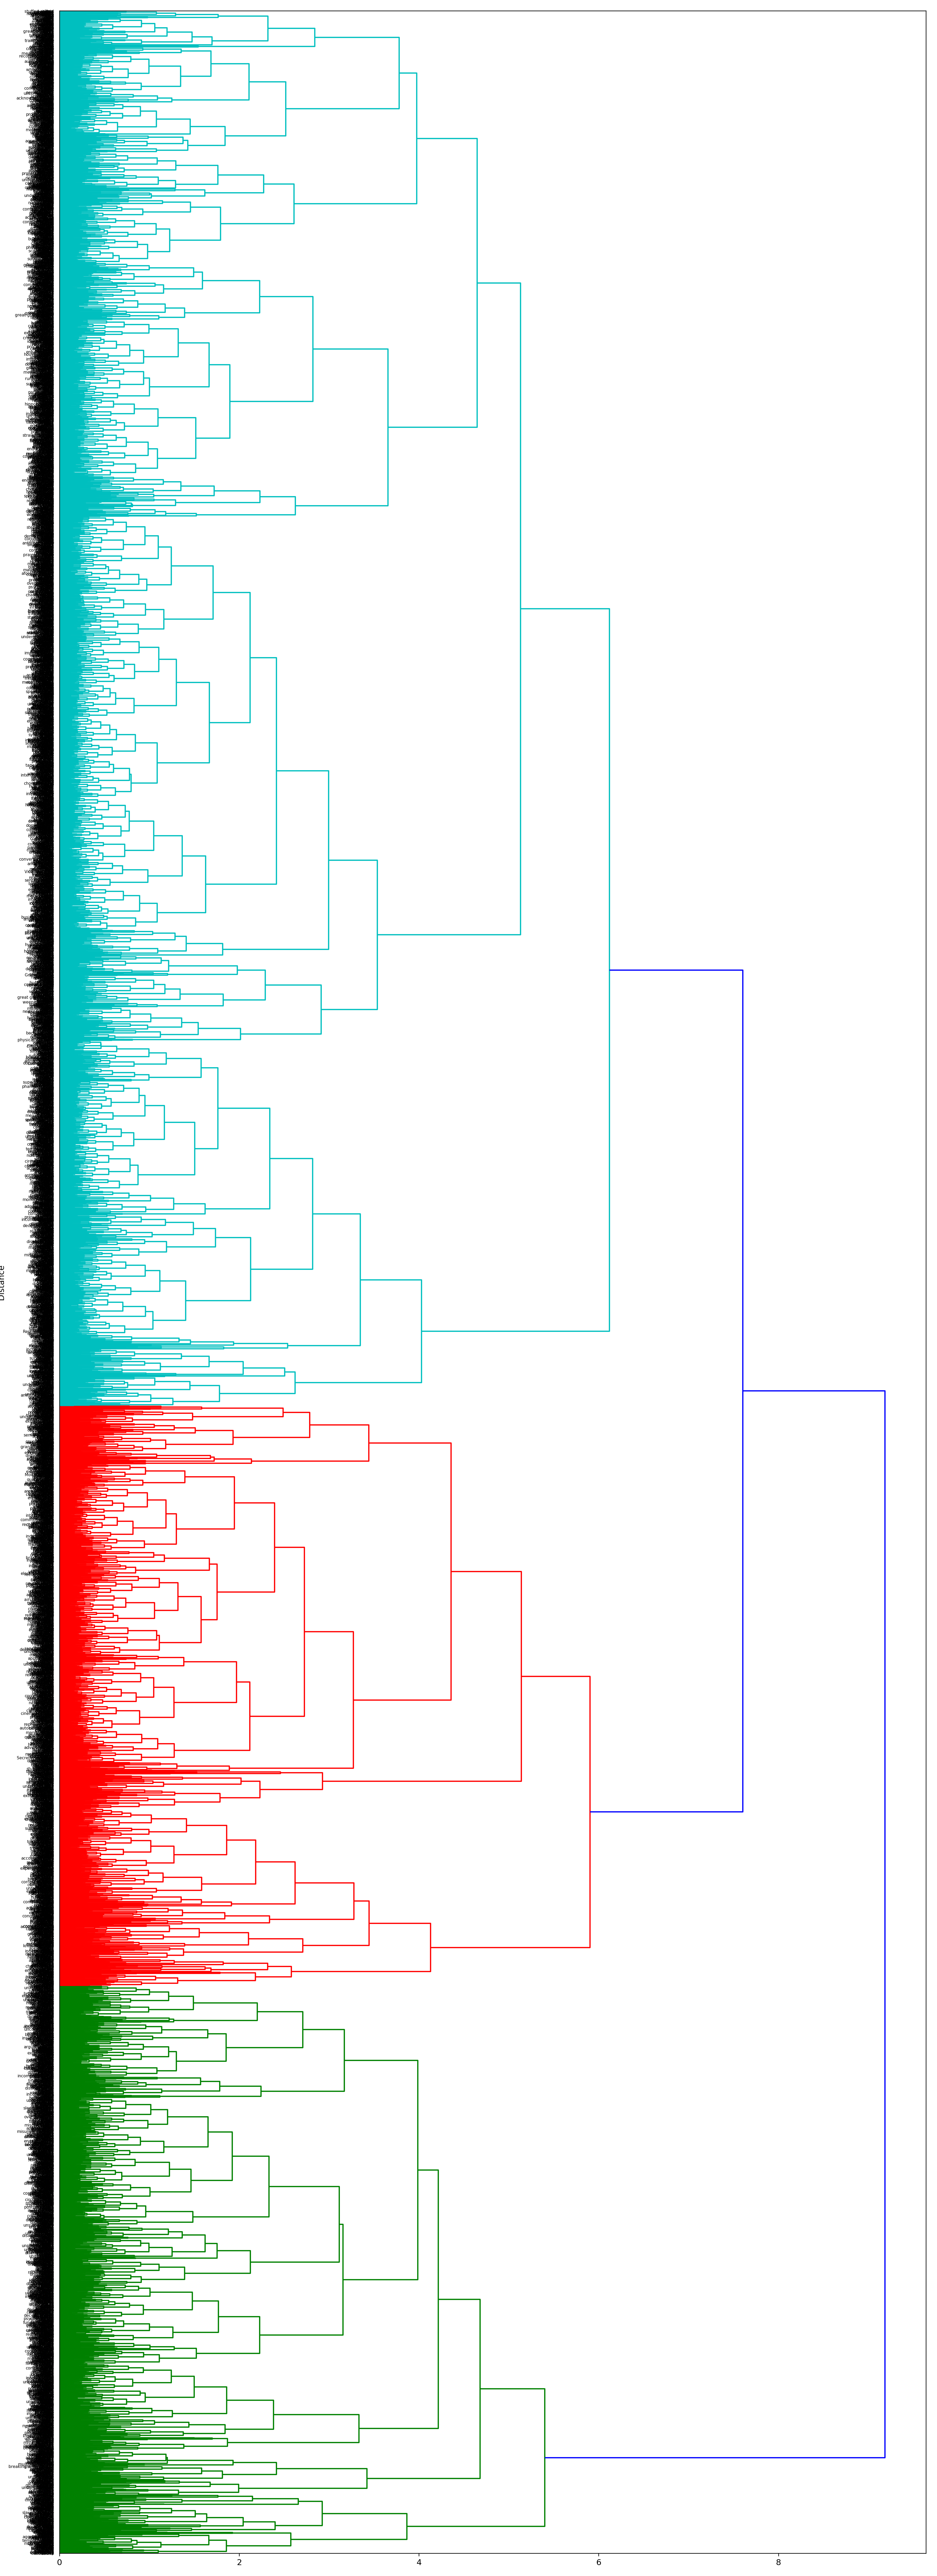

In [14]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
row_clusters = linkage(pdist(df[targets], metric='euclidean'), method='complete')
f,ax = plt.subplots(figsize=(16,44))
row_dendr = dendrogram(row_clusters, 
                       labels=df['Word'].values, 
                       orientation='right'
                      )
f.tight_layout()
ax.set_ylabel('Distance')
f.savefig('WarrinerDendrogram.png')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(df[targets].values)

In [ ]:
df['label'] = labels
df.groupby('label')[targets].mean()

In [ ]:
colors = ['b','r','g']
df['label_color'] = df['label'].apply(lambda l: colors[l])

sample_words = """
Stress
Intoxication
Fatigue
Positivity
Negativity
Emotionality
Focus
Activity
Engagement
Arousal
Excitement
Dominance
Valence
Affection
Anger
Boredom
Contentment
Depression
Disgust
Enthusiasm
Excitement
Fear
Frustration
Happiness
Interest
Joy
Nervousness
Panic
Pride
Relaxation
Sadness
Surprise
Satisfaction
Tension
Worry
Activation""".lower().split()

df['in_sample'] = df['Word'].isin(sample_words)

<IPython.core.display.Javascript object>


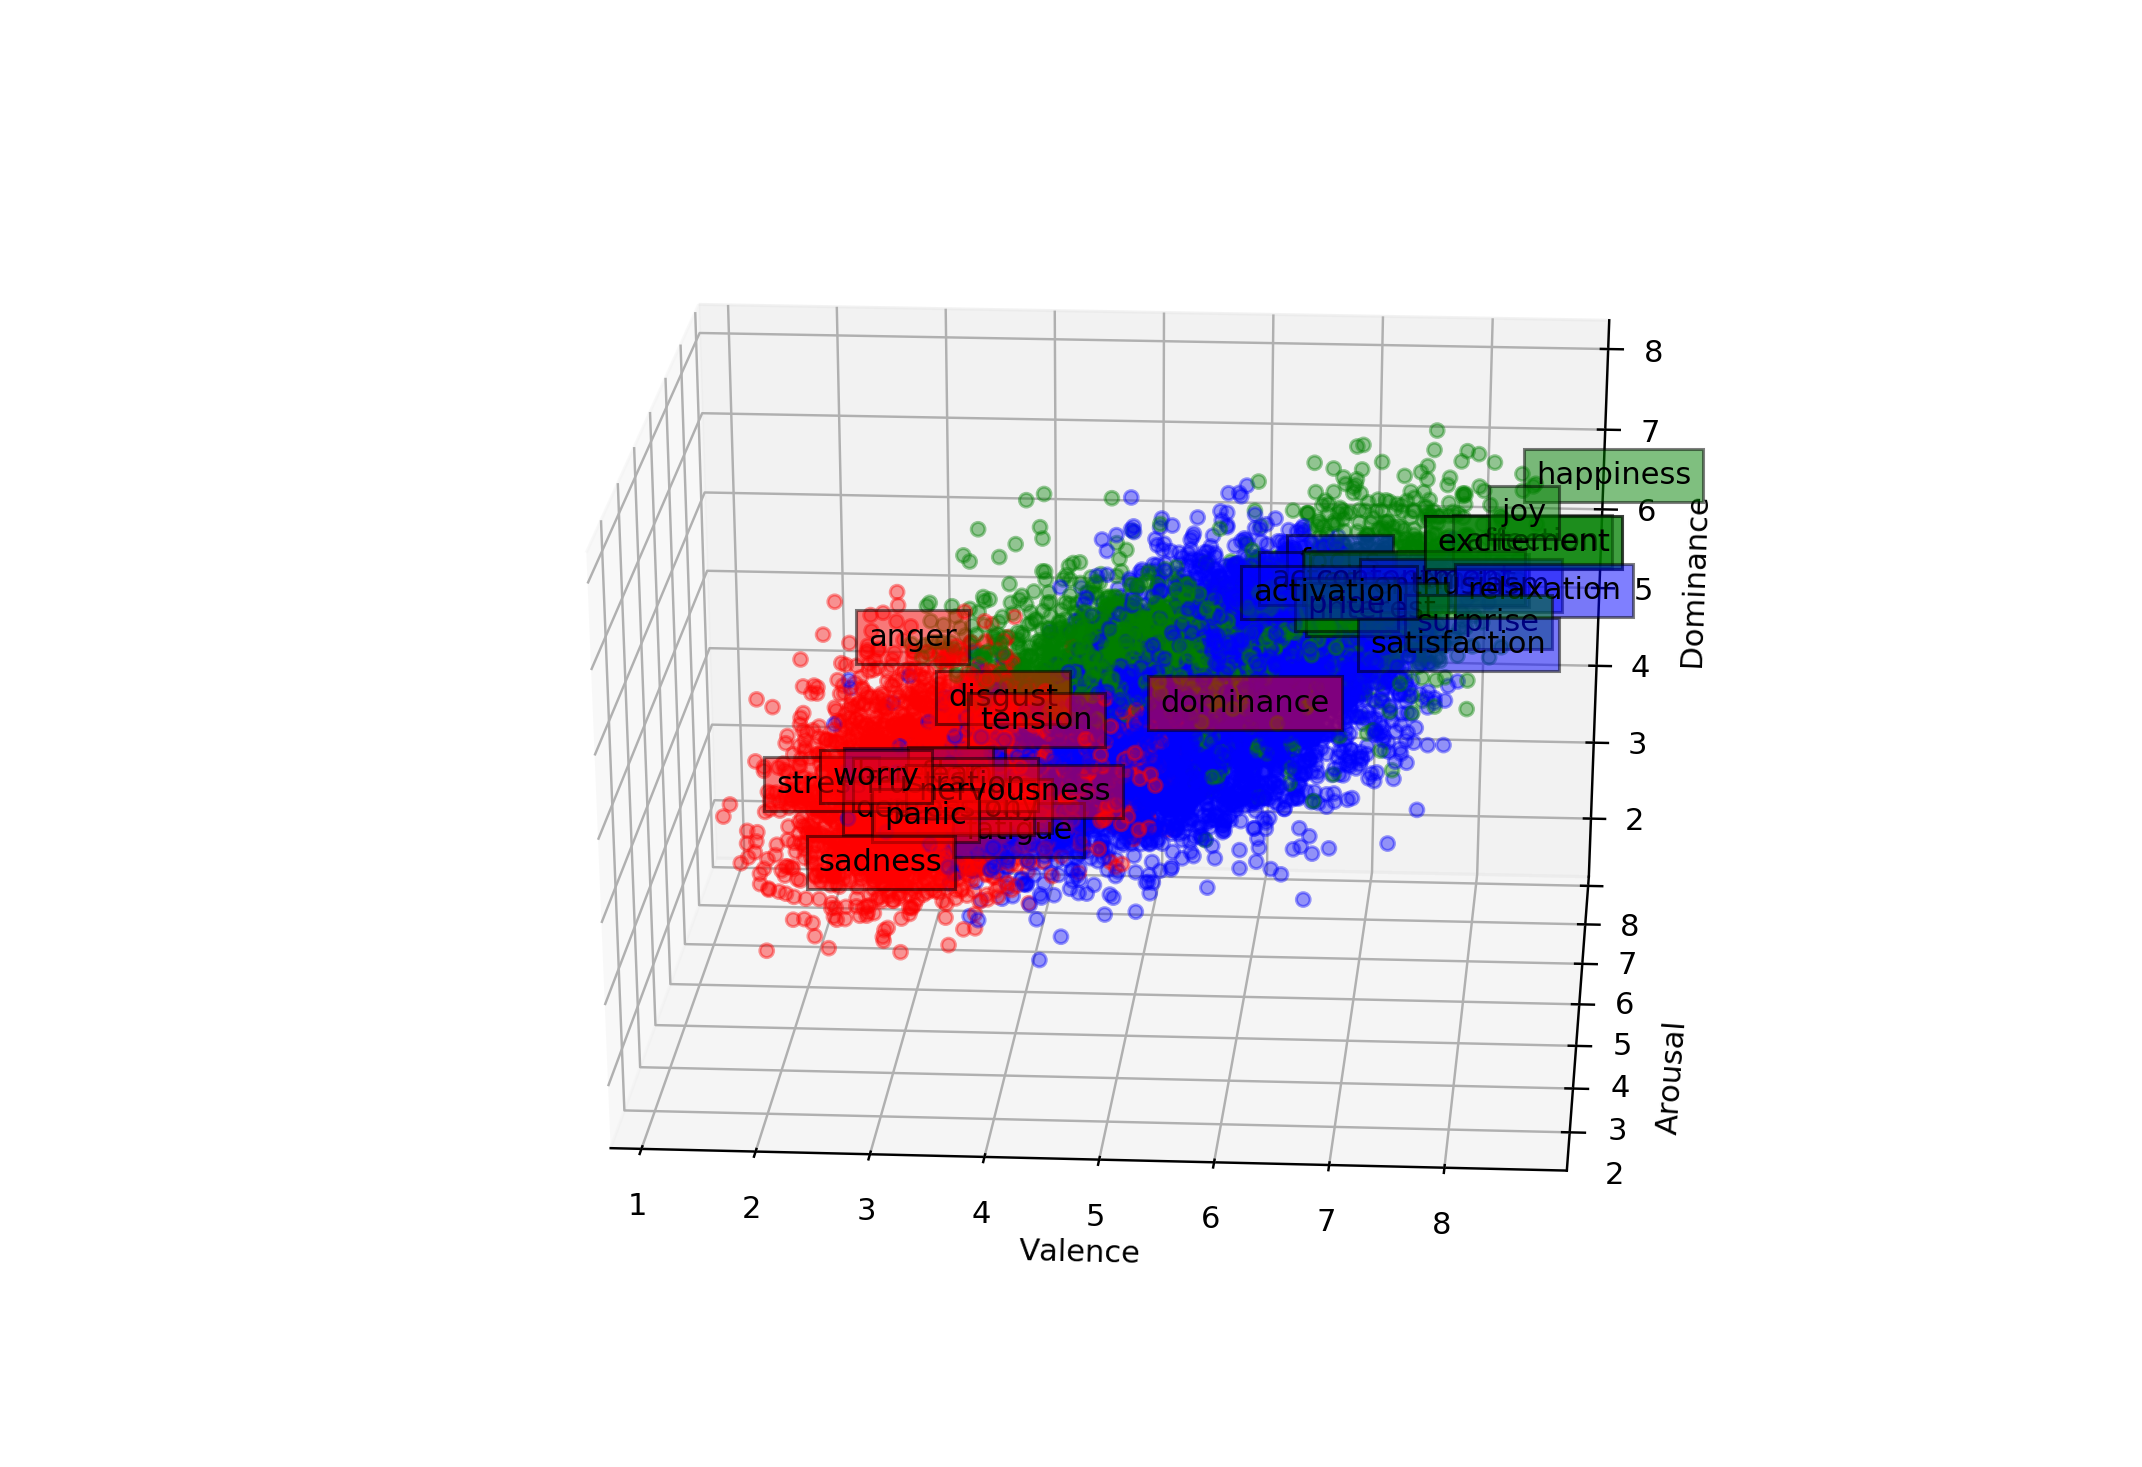

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
targets=['V.Mean.Sum','A.Mean.Sum','D.Mean.Sum', 'label_color']
v,a,d,c = df[targets].values.T
ax.scatter(v,a,d,c=c, alpha=0.4)
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
for w in sample_words:
    try:
        v,a,d,c = df[df['Word']==w][targets].values[0]
        ax.text(v,a,d,w, zorder=1, bbox=dict(facecolor=c, alpha=0.5))
    except (KeyError, IndexError):
        pass
    except:
        raise

In [25]:
import cufflinks
import plotly

df.iplot(kind='scatter3d', 
           x=targets[0], xTitle='Valence',
           y=targets[1], yTitle='Arousal',
           z=targets[2], zTitle='Dominance', width=0,
           categories='label_color',
           size=2, mode='markers', symbol='circle', text='Word',)